In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

### Loading the Dataset

In [2]:
df = pd.read_csv('/Users/adrianabrazon/Documents/IronHack/final_project/Animal_Shelter_Intake_and_Outcome_20240413.csv')

### Initial Exploration

In [3]:
def first_analysis(df):
    """Analyses briefly a dataframe: displays head, column names, shape, dtypes, checks for null values and duplicates"""
    display(df.head())
    print('Column names:', df.columns)
    display(f'Shape: {df.shape}')
    print('Data types:', 'numerical:', df.select_dtypes(include='number').shape, 'categorical:', df.select_dtypes(include='object').shape )
    print(f'\n   Looking for null values: \n  {df.isnull().sum().sort_values(ascending=False)}')
    print(f'\n   Checking for duplicates: \n  {df.duplicated().any()}')

In [4]:
first_analysis(df)

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,NaN,OTHER,BAT,BROWN,Unknown,SMALL,NaN,K24-047892,EUTH,A425283,...,OVER THE COUNTER,TRANSFER,LAB FRA,UNKNOWN,DEAD,COUNTY,NaN,NaN,NaN,1
1,NaN,DOG,GERM SHEPHERD/MIX,BROWN/BLACK,Female,LARGE,NaN,K24-047989,DS68,A425475,...,FLD_STRAY,NaN,NaN,UNKNOWN,NaN,COUNTY,NaN,NaN,NaN,1
2,NaN,DOG,SIBERIAN HUSKY,BLACK/WHITE,Male,MED,NaN,K23-046984,DA21,A422697,...,FLD_STRAY,EUTHANIZE,AGGRESSIVE,UNKNOWN,UNTREATABLE,COUNTY,NaN,NaN,NaN,1
3,PINTO,DOG,PIT BULL,BR BRINDLE/WHITE,Neutered,LARGE,07/27/2016,K19-032986,DA35,A389457,...,FIELD,TRANSFER,HSSC,HEALTHY,HEALTHY,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",1
4,NaN,DOG,PIT BULL,GRAY,Female,MED,NaN,K23-046923,DS60,A422443,...,FLD_STRAY,EUTHANIZE,BEH SEVERE,UNKNOWN,UNTREATABLE,SANTA ROSA,NaN,NaN,NaN,1


Column names: Index(['Name', 'Type', 'Breed', 'Color', 'Sex', 'Size', 'Date Of Birth',
       'Impound Number', 'Kennel Number', 'Animal ID', 'Intake Date',
       'Outcome Date', 'Days in Shelter', 'Intake Type', 'Intake Subtype',
       'Outcome Type', 'Outcome Subtype', 'Intake Condition',
       'Outcome Condition', 'Intake Jurisdiction', 'Outcome Jurisdiction',
       'Outcome Zip Code', 'Location', 'Count'],
      dtype='object')


'Shape: (27550, 24)'

Data types: numerical: (27550, 3) categorical: (27550, 21)

   Looking for null values: 
  Name                    7222
Date Of Birth           6786
Location                3947
Outcome Zip Code        3947
Outcome Jurisdiction    3917
Outcome Condition        545
Outcome Subtype          522
Outcome Type             191
Outcome Date             185
Size                      36
Kennel Number             10
Intake Subtype             0
Intake Jurisdiction        0
Intake Condition           0
Days in Shelter            0
Intake Type                0
Type                       0
Intake Date                0
Animal ID                  0
Impound Number             0
Sex                        0
Color                      0
Breed                      0
Count                      0
dtype: int64

   Checking for duplicates: 
  False


In [5]:
def clean_columns_names(df):
    df.columns = df.columns.str.lower().str.strip().str.replace(" " or "-", "_")
    return df

In [6]:
df = clean_columns_names(df)
df.columns

Index(['name', 'type', 'breed', 'color', 'sex', 'size', 'date_of_birth',
       'impound_number', 'kennel_number', 'animal_id', 'intake_date',
       'outcome_date', 'days_in_shelter', 'intake_type', 'intake_subtype',
       'outcome_type', 'outcome_subtype', 'intake_condition',
       'outcome_condition', 'intake_jurisdiction', 'outcome_jurisdiction',
       'outcome_zip_code', 'location', 'count'],
      dtype='object')

In [7]:
df=df.drop(columns=['name', 'count','impound_number','kennel_number'])
df.dropna(subset=['breed', 'color', 'sex', 'size', 'date_of_birth', 
                  'animal_id', 'intake_date','outcome_date', 'days_in_shelter',
                  'intake_type', 'intake_subtype',
                  'outcome_type', 'outcome_subtype', 'intake_condition',
                  'outcome_condition', 'intake_jurisdiction', 'outcome_jurisdiction',
                  'outcome_zip_code', 'location'], inplace=True) 

In [8]:
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)
df.head()

,type,breed,color,sex,size,date_of_birth,animal_id,intake_date,outcome_date,days_in_shelter,intake_type,intake_subtype,outcome_type,outcome_subtype,intake_condition,outcome_condition,intake_jurisdiction,outcome_jurisdiction,outcome_zip_code,location
0,DOG,PIT BULL,BR BRINDLE/WHITE,Neutered,LARGE,07/27/2016,A389457,07/16/2019,08/30/2019,45,STRAY,FIELD,TRANSFER,HSSC,HEALTHY,HEALTHY,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)"
1,DOG,PIT BULL,BR BRINDLE/WHITE,Neutered,LARGE,07/27/2016,A389457,03/24/2024,03/26/2024,2,STRAY,FLD_STRAY,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)"
2,DOG,GERM SHEPHERD,BLACK/TAN,Spayed,LARGE,08/26/2022,A419963,08/26/2023,03/26/2024,213,STRAY,OVER THE COUNTER,ADOPTION,OTH_MEDIA,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95441.0,"95441(38.70854, -122.90737)"
3,DOG,SHIH TZU,TAN,Female,TOY,05/26/2014,A425507,03/26/2024,03/26/2024,0,STRAY,OVER THE COUNTER,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,COUNTY,*SEBASTOPOL,95472.0,"95472(38.4007555, -122.8277055)"
4,CAT,DOMESTIC SH,BRN TABBY,Spayed,SMALL,07/19/2023,A423448,12/19/2023,01/09/2024,21,STRAY,OVER THE COUNTER,ADOPTION,FINDER,HEALTHY,HEALTHY,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)"


In [9]:
df.dtypes

type                     object
breed                    object
color                    object
sex                      object
size                     object
date_of_birth            object
animal_id                object
intake_date              object
outcome_date             object
days_in_shelter           int64
intake_type              object
intake_subtype           object
outcome_type             object
outcome_subtype          object
intake_condition         object
outcome_condition        object
intake_jurisdiction      object
outcome_jurisdiction     object
outcome_zip_code        float64
location                 object
dtype: object

In [10]:
pd.set_option('display.max_columns', 500)

numeric_columns = df.select_dtypes(include='number')
object_columns = df.select_dtypes(include='object')

In [11]:
numeric_columns.describe()

,days_in_shelter,outcome_zip_code
count,18509.000000,18509.000000
mean,22.728997,95023.928791
std,39.918601,3766.875582
min,0.000000,1922.000000
25%,2.000000,95401.000000
50%,11.000000,95405.000000
75%,29.000000,95436.000000
max,1239.000000,99323.000000


In [12]:
object_columns.describe()

,type,breed,color,sex,size,date_of_birth,animal_id,intake_date,outcome_date,intake_type,intake_subtype,outcome_type,outcome_subtype,intake_condition,outcome_condition,intake_jurisdiction,outcome_jurisdiction,location
count,18509,18509,18509,18509,18509,18509,18509,18509,18509,18509,18509,18509,18509,18509,18509,18509,18509,18509
unique,3,925,283,5,7,5760,16246,3373,2858,7,33,9,199,5,6,13,12,625
top,DOG,DOMESTIC SH,BLACK/WHITE,Neutered,SMALL,05/01/2023,A322298,08/29/2015,10/26/2019,STRAY,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,"95407(38.4127094, -122.7412153)"
freq,11625,4941,2196,7370,6152,25,19,31,50,13242,7745,7702,3585,10596,13518,9432,6838,2872


### A closer look at days spent at the shelter vs. age

In [13]:
today = datetime.now()
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
df['age'] = today.year - df['date_of_birth'].dt.year
df['age'] -= ((today.month == df['date_of_birth'].dt.month) & (today.day < df['date_of_birth'].dt.day)).astype(int)

In [14]:
first_analysis(df)

,type,breed,color,sex,size,date_of_birth,animal_id,intake_date,outcome_date,days_in_shelter,intake_type,intake_subtype,outcome_type,outcome_subtype,intake_condition,outcome_condition,intake_jurisdiction,outcome_jurisdiction,outcome_zip_code,location,age
0,DOG,PIT BULL,BR BRINDLE/WHITE,Neutered,LARGE,2016-07-27,A389457,07/16/2019,08/30/2019,45,STRAY,FIELD,TRANSFER,HSSC,HEALTHY,HEALTHY,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",8
1,DOG,PIT BULL,BR BRINDLE/WHITE,Neutered,LARGE,2016-07-27,A389457,03/24/2024,03/26/2024,2,STRAY,FLD_STRAY,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",8
2,DOG,GERM SHEPHERD,BLACK/TAN,Spayed,LARGE,2022-08-26,A419963,08/26/2023,03/26/2024,213,STRAY,OVER THE COUNTER,ADOPTION,OTH_MEDIA,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95441.0,"95441(38.70854, -122.90737)",2
3,DOG,SHIH TZU,TAN,Female,TOY,2014-05-26,A425507,03/26/2024,03/26/2024,0,STRAY,OVER THE COUNTER,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,COUNTY,*SEBASTOPOL,95472.0,"95472(38.4007555, -122.8277055)",10
4,CAT,DOMESTIC SH,BRN TABBY,Spayed,SMALL,2023-07-19,A423448,12/19/2023,01/09/2024,21,STRAY,OVER THE COUNTER,ADOPTION,FINDER,HEALTHY,HEALTHY,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",1


Column names: Index(['type', 'breed', 'color', 'sex', 'size', 'date_of_birth', 'animal_id',
       'intake_date', 'outcome_date', 'days_in_shelter', 'intake_type',
       'intake_subtype', 'outcome_type', 'outcome_subtype', 'intake_condition',
       'outcome_condition', 'intake_jurisdiction', 'outcome_jurisdiction',
       'outcome_zip_code', 'location', 'age'],
      dtype='object')


'Shape: (18509, 21)'

Data types: numerical: (18509, 3) categorical: (18509, 17)

   Looking for null values: 
  type                    0
intake_subtype          0
location                0
outcome_zip_code        0
outcome_jurisdiction    0
intake_jurisdiction     0
outcome_condition       0
intake_condition        0
outcome_subtype         0
outcome_type            0
intake_type             0
breed                   0
days_in_shelter         0
outcome_date            0
intake_date             0
animal_id               0
date_of_birth           0
size                    0
sex                     0
color                   0
age                     0
dtype: int64

   Checking for duplicates: 
  False


In [15]:
df = df[df['age']<=20]
df = df.drop(columns=['date_of_birth'])

In [16]:
df_shelter = df.copy()

df_shelter.head()

,type,breed,color,sex,size,animal_id,intake_date,outcome_date,days_in_shelter,intake_type,intake_subtype,outcome_type,outcome_subtype,intake_condition,outcome_condition,intake_jurisdiction,outcome_jurisdiction,outcome_zip_code,location,age
0,DOG,PIT BULL,BR BRINDLE/WHITE,Neutered,LARGE,A389457,07/16/2019,08/30/2019,45,STRAY,FIELD,TRANSFER,HSSC,HEALTHY,HEALTHY,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",8
1,DOG,PIT BULL,BR BRINDLE/WHITE,Neutered,LARGE,A389457,03/24/2024,03/26/2024,2,STRAY,FLD_STRAY,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",8
2,DOG,GERM SHEPHERD,BLACK/TAN,Spayed,LARGE,A419963,08/26/2023,03/26/2024,213,STRAY,OVER THE COUNTER,ADOPTION,OTH_MEDIA,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95441.0,"95441(38.70854, -122.90737)",2
3,DOG,SHIH TZU,TAN,Female,TOY,A425507,03/26/2024,03/26/2024,0,STRAY,OVER THE COUNTER,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,COUNTY,*SEBASTOPOL,95472.0,"95472(38.4007555, -122.8277055)",10
4,CAT,DOMESTIC SH,BRN TABBY,Spayed,SMALL,A423448,12/19/2023,01/09/2024,21,STRAY,OVER THE COUNTER,ADOPTION,FINDER,HEALTHY,HEALTHY,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",1


In [17]:
first_analysis(df_shelter)

,type,breed,color,sex,size,animal_id,intake_date,outcome_date,days_in_shelter,intake_type,intake_subtype,outcome_type,outcome_subtype,intake_condition,outcome_condition,intake_jurisdiction,outcome_jurisdiction,outcome_zip_code,location,age
0,DOG,PIT BULL,BR BRINDLE/WHITE,Neutered,LARGE,A389457,07/16/2019,08/30/2019,45,STRAY,FIELD,TRANSFER,HSSC,HEALTHY,HEALTHY,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",8
1,DOG,PIT BULL,BR BRINDLE/WHITE,Neutered,LARGE,A389457,03/24/2024,03/26/2024,2,STRAY,FLD_STRAY,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",8
2,DOG,GERM SHEPHERD,BLACK/TAN,Spayed,LARGE,A419963,08/26/2023,03/26/2024,213,STRAY,OVER THE COUNTER,ADOPTION,OTH_MEDIA,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95441.0,"95441(38.70854, -122.90737)",2
3,DOG,SHIH TZU,TAN,Female,TOY,A425507,03/26/2024,03/26/2024,0,STRAY,OVER THE COUNTER,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,COUNTY,*SEBASTOPOL,95472.0,"95472(38.4007555, -122.8277055)",10
4,CAT,DOMESTIC SH,BRN TABBY,Spayed,SMALL,A423448,12/19/2023,01/09/2024,21,STRAY,OVER THE COUNTER,ADOPTION,FINDER,HEALTHY,HEALTHY,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",1


Column names: Index(['type', 'breed', 'color', 'sex', 'size', 'animal_id', 'intake_date',
       'outcome_date', 'days_in_shelter', 'intake_type', 'intake_subtype',
       'outcome_type', 'outcome_subtype', 'intake_condition',
       'outcome_condition', 'intake_jurisdiction', 'outcome_jurisdiction',
       'outcome_zip_code', 'location', 'age'],
      dtype='object')


'Shape: (18086, 20)'

Data types: numerical: (18086, 3) categorical: (18086, 17)

   Looking for null values: 
  type                    0
breed                   0
location                0
outcome_zip_code        0
outcome_jurisdiction    0
intake_jurisdiction     0
outcome_condition       0
intake_condition        0
outcome_subtype         0
outcome_type            0
intake_subtype          0
intake_type             0
days_in_shelter         0
outcome_date            0
intake_date             0
animal_id               0
size                    0
sex                     0
color                   0
age                     0
dtype: int64

   Checking for duplicates: 
  False


In [18]:
df_shelter.dtypes

type                     object
breed                    object
color                    object
sex                      object
size                     object
animal_id                object
intake_date              object
outcome_date             object
days_in_shelter           int64
intake_type              object
intake_subtype           object
outcome_type             object
outcome_subtype          object
intake_condition         object
outcome_condition        object
intake_jurisdiction      object
outcome_jurisdiction     object
outcome_zip_code        float64
location                 object
age                       int64
dtype: object

In [19]:
df_shelter.outcome_subtype.value_counts()

outcome_subtype
WALKIN                   3565
SCAS WEB                 1615
OVER THE COUNTER_WEB     1561
HSSC                     1210
OVER THE COUNTER_PRVS    1085
                         ... 
WASHOE VAL                  1
MCHS                        1
WILD RESCU                  1
JINDO PROJ                  1
POWERCHI                    1
Name: count, Length: 195, dtype: int64

/var/folders/84/gcp9xbms2mj2xtqtdk7w5ckr0000gn/T/ipykernel_18625/1226197517.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_df.index, y=percentage_df.values, palette='Set3')  # Using the 'Set2' palette


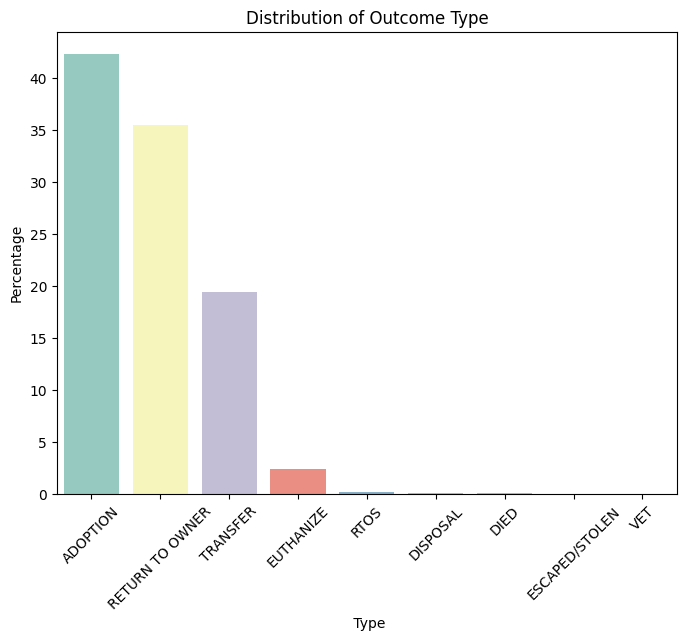

In [20]:
# Plotting the distribution of outcome_type

# Calculate the percentage of each category
percentage_df = df_shelter['outcome_type'].value_counts(normalize=True) * 100

# Plotting the distribution of bleaching_status with percentage
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_df.index, y=percentage_df.values, palette='Set3')  # Using the 'Set2' palette
plt.title('Distribution of Outcome Type')
plt.xlabel('')
plt.xticks(rotation=45)
plt.ylabel('Percentage')
plt.show()

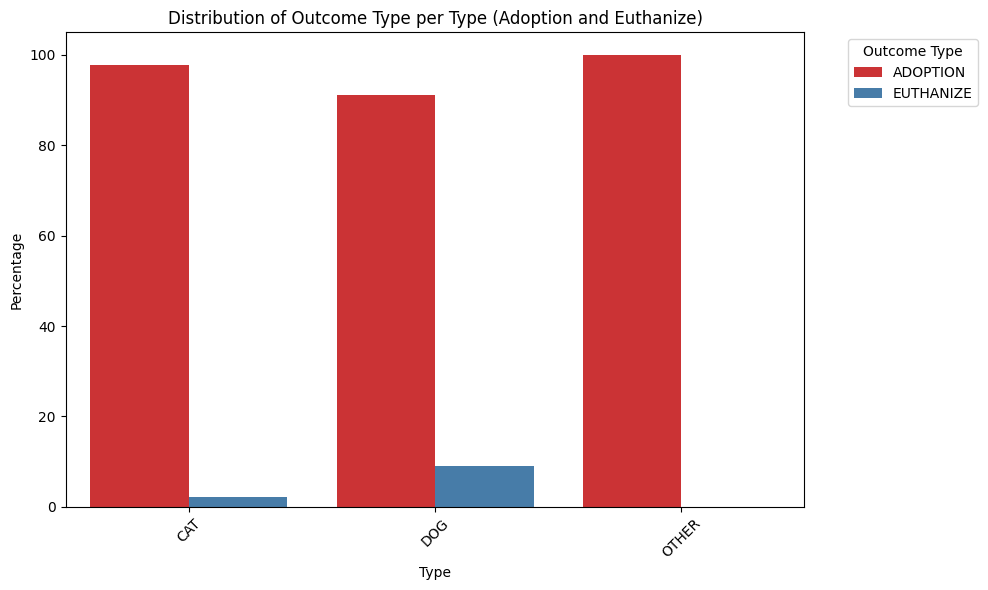

In [259]:
# Filter the DataFrame for rows where outcome_type is 'ADOPTION' or 'EUTHANIZE'
filtered_df = df_shelter[df_shelter['outcome_type'].isin(['ADOPTION', 'EUTHANIZE'])]

# Calculate the percentage of each category per type
percentage_df = filtered_df.groupby(['type', 'outcome_type']).size() / filtered_df.groupby('type').size() * 100

# Reset index to make 'type' and 'outcome_type' columns again
percentage_df = percentage_df.reset_index(name='percentage')

# Plotting the distribution of bleaching_status per ocean
plt.figure(figsize=(10, 6))
sns.barplot(data=percentage_df, x='type', y='percentage', hue='outcome_type', palette='Set1')
plt.title('Distribution of Outcome Type per Type (Adoption and Euthanize)')
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Outcome Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

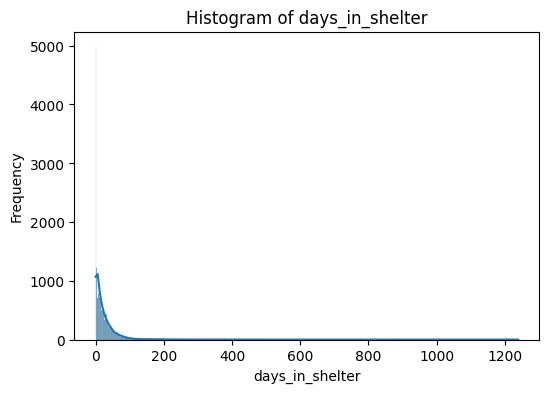

/Users/adrianabrazon/Documents/IronHack/final_project/.venv/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test for days_in_shelter:
Statistic: 0.5063483715057373, p-value: 0.0
The data does not appear to be normally distributed.


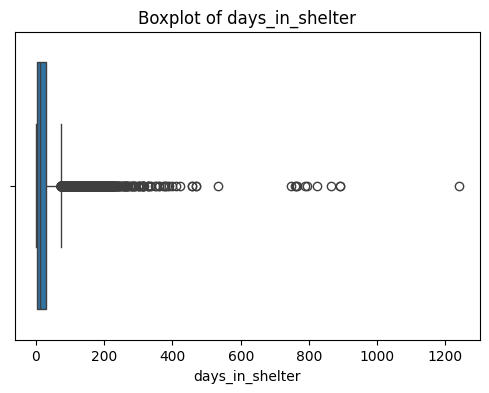

Skewness of days_in_shelter: 8.558080705070093


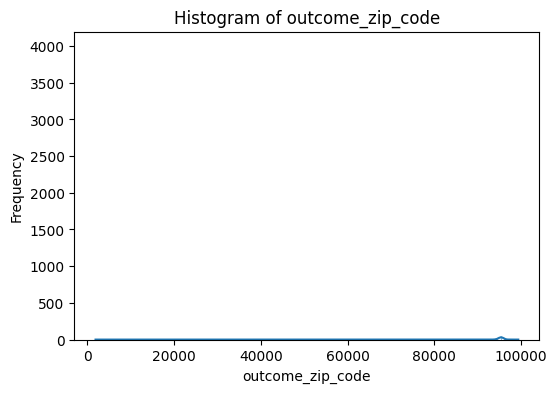

/Users/adrianabrazon/Documents/IronHack/final_project/.venv/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test for outcome_zip_code:
Statistic: 0.08697152137756348, p-value: 0.0
The data does not appear to be normally distributed.


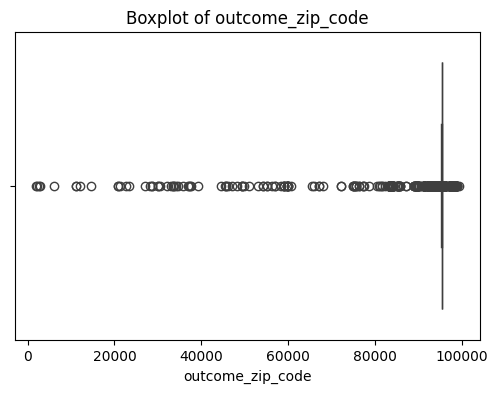

Skewness of outcome_zip_code: -16.329323251985922


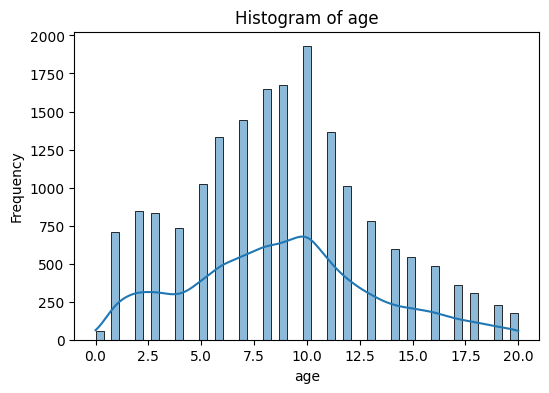

/Users/adrianabrazon/Documents/IronHack/final_project/.venv/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test for age:
Statistic: 0.9805630445480347, p-value: 1.485376372184306e-43
The data does not appear to be normally distributed.


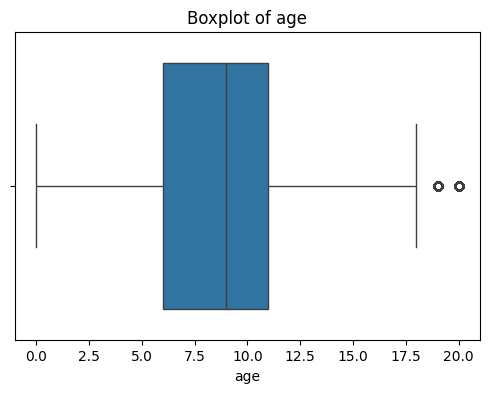

Skewness of age: 0.26626868714553714


In [266]:
from scipy.stats import shapiro

# Check distribution of numerical columns
numerical_df_shelter = df_shelter.select_dtypes(include=['float64', 'int64'])

# Visualize histograms for numerical columns
for column in numerical_df_shelter.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=numerical_df_shelter[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # Check normality using Shapiro-Wilk test
    stat, p = shapiro(numerical_df_shelter[column])
    print(f'Shapiro-Wilk test for {column}:')
    print(f'Statistic: {stat}, p-value: {p}')
    if p < 0.05:
        print('The data does not appear to be normally distributed.')
    else:
        print('The data appears to be normally distributed.')

    # Check for outliers using box plot
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=numerical_df_shelter[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

    # Calculate skewness
    skewness = numerical_df_shelter[column].skew()
    print(f'Skewness of {column}: {skewness}')

In [217]:
df_shelter['outcome_type'].value_counts()

outcome_type
ADOPTION           7656
RETURN TO OWNER    6416
TRANSFER           3508
EUTHANIZE           429
RTOS                 38
DISPOSAL             24
DIED                 16
ESCAPED/STOLEN        1
VET                   1
Name: count, dtype: int64

In [218]:
# df_shelter.to_csv('df_shelter.csv', index=False)

In [219]:
df_outcome = df_shelter[(df_shelter['outcome_type'] == 'ADOPTION') | (df_shelter['outcome_type'] =='EUTHANIZE') | (df_shelter['outcome_type'] =='RETURN TO OWNER') | (df_shelter['outcome_type'] =='TRANSFER')]
df_outcome = df_outcome.reset_index(drop=True)
df_outcome

,type,breed,color,sex,size,animal_id,intake_date,outcome_date,days_in_shelter,intake_type,intake_subtype,outcome_type,outcome_subtype,intake_condition,outcome_condition,intake_jurisdiction,outcome_jurisdiction,outcome_zip_code,location,age
0,DOG,PIT BULL,BR BRINDLE/WHITE,Neutered,LARGE,A389457,07/16/2019,08/30/2019,45,STRAY,FIELD,TRANSFER,HSSC,HEALTHY,HEALTHY,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",8
1,DOG,PIT BULL,BR BRINDLE/WHITE,Neutered,LARGE,A389457,03/24/2024,03/26/2024,2,STRAY,FLD_STRAY,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",8
2,DOG,GERM SHEPHERD,BLACK/TAN,Spayed,LARGE,A419963,08/26/2023,03/26/2024,213,STRAY,OVER THE COUNTER,ADOPTION,OTH_MEDIA,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95441.0,"95441(38.70854, -122.90737)",2
3,DOG,SHIH TZU,TAN,Female,TOY,A425507,03/26/2024,03/26/2024,0,STRAY,OVER THE COUNTER,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,COUNTY,*SEBASTOPOL,95472.0,"95472(38.4007555, -122.8277055)",10
4,CAT,DOMESTIC SH,BRN TABBY,Spayed,SMALL,A423448,12/19/2023,01/09/2024,21,STRAY,OVER THE COUNTER,ADOPTION,FINDER,HEALTHY,HEALTHY,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18004,DOG,CHIHUAHUA SH,BR BRINDLE,Neutered,TOY,A311089,09/03/2014,09/12/2014,9,STRAY,FIELD,ADOPTION,WALKIN,HEALTHY,HEALTHY,COUNTY,OUT OF COUNTY,94591.0,"94591(38.10605, -122.22251)",11
18005,DOG,LABRADOR RETR/MIX,SILVER,Spayed,MED,A393222,03/03/2016,03/04/2016,1,STRAY,FIELD,RETURN TO OWNER,OVER THE COUNTER_WEB,HEALTHY,HEALTHY,*WINDSOR,*WINDSOR,95492.0,"95492(38.541355, -122.80026)",14
18006,DOG,CHIHUAHUA SH/MIX,TAN,Spayed,SMALL,A352712,06/20/2017,06/21/2017,1,STRAY,OVER THE COUNTER,RETURN TO OWNER,OVER THE COUNTER_MCHIP,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95462.0,"95462(38.46819, -123.01142)",8
18007,CAT,DOMESTIC SH,BLACK/WHITE,Neutered,SMALL,A405315,06/15/2021,07/08/2021,23,OWNER SURRENDER,OVER THE COUNTER,TRANSFER,HSSC,UNKNOWN,TREATABLE/REHAB,SANTA ROSA,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",6


In [220]:
dogs_df = df_outcome[df_outcome['type'] == 'DOG']
cats_df = df_outcome[df_outcome['type'] == 'CAT']

In [221]:
df_shelter.describe()

,days_in_shelter,outcome_zip_code,age
count,18089.000000,18089.000000,18089.000000
mean,23.002543,95022.801371,8.827685
std,39.792387,3755.136479,4.425809
min,0.000000,1922.000000,0.000000
25%,2.000000,95401.000000,6.000000
50%,12.000000,95405.000000,9.000000
75%,30.000000,95436.000000,11.000000
max,1239.000000,99323.000000,20.000000


In [222]:
df1 = df_shelter[df_shelter['age']<=20]
df1

,type,breed,color,sex,size,animal_id,intake_date,outcome_date,days_in_shelter,intake_type,intake_subtype,outcome_type,outcome_subtype,intake_condition,outcome_condition,intake_jurisdiction,outcome_jurisdiction,outcome_zip_code,location,age
0,DOG,PIT BULL,BR BRINDLE/WHITE,Neutered,LARGE,A389457,07/16/2019,08/30/2019,45,STRAY,FIELD,TRANSFER,HSSC,HEALTHY,HEALTHY,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",8
1,DOG,PIT BULL,BR BRINDLE/WHITE,Neutered,LARGE,A389457,03/24/2024,03/26/2024,2,STRAY,FLD_STRAY,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",8
2,DOG,GERM SHEPHERD,BLACK/TAN,Spayed,LARGE,A419963,08/26/2023,03/26/2024,213,STRAY,OVER THE COUNTER,ADOPTION,OTH_MEDIA,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95441.0,"95441(38.70854, -122.90737)",2
3,DOG,SHIH TZU,TAN,Female,TOY,A425507,03/26/2024,03/26/2024,0,STRAY,OVER THE COUNTER,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,COUNTY,*SEBASTOPOL,95472.0,"95472(38.4007555, -122.8277055)",10
4,CAT,DOMESTIC SH,BRN TABBY,Spayed,SMALL,A423448,12/19/2023,01/09/2024,21,STRAY,OVER THE COUNTER,ADOPTION,FINDER,HEALTHY,HEALTHY,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18504,DOG,CHIHUAHUA SH,BR BRINDLE,Neutered,TOY,A311089,09/03/2014,09/12/2014,9,STRAY,FIELD,ADOPTION,WALKIN,HEALTHY,HEALTHY,COUNTY,OUT OF COUNTY,94591.0,"94591(38.10605, -122.22251)",11
18505,DOG,LABRADOR RETR/MIX,SILVER,Spayed,MED,A393222,03/03/2016,03/04/2016,1,STRAY,FIELD,RETURN TO OWNER,OVER THE COUNTER_WEB,HEALTHY,HEALTHY,*WINDSOR,*WINDSOR,95492.0,"95492(38.541355, -122.80026)",14
18506,DOG,CHIHUAHUA SH/MIX,TAN,Spayed,SMALL,A352712,06/20/2017,06/21/2017,1,STRAY,OVER THE COUNTER,RETURN TO OWNER,OVER THE COUNTER_MCHIP,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95462.0,"95462(38.46819, -123.01142)",8
18507,CAT,DOMESTIC SH,BLACK/WHITE,Neutered,SMALL,A405315,06/15/2021,07/08/2021,23,OWNER SURRENDER,OVER THE COUNTER,TRANSFER,HSSC,UNKNOWN,TREATABLE/REHAB,SANTA ROSA,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",6


In [223]:
df.type.value_counts()

type
DOG      11322
CAT       6202
OTHER      565
Name: count, dtype: int64

Text(0.5, 1.0, 'Days in Shelter by Age, for Dogs and Cats Euthanized')

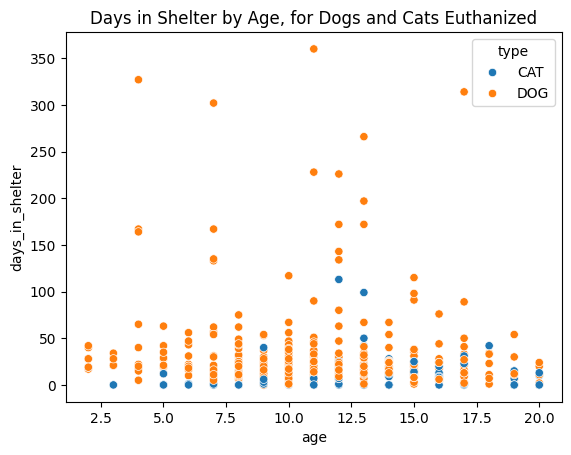

In [224]:
filtered_df = df[(df['type'].isin(['DOG', 'CAT'])) & (df['outcome_type'] == 'EUTHANIZE')]

# Create the scatter plot
sns.scatterplot(data=filtered_df, x='age', y='days_in_shelter', hue='type')
plt.title('Days in Shelter by Age, for Dogs and Cats Euthanized')

/var/folders/84/gcp9xbms2mj2xtqtdk7w5ckr0000gn/T/ipykernel_76036/4000994171.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Dogs', 'Cats'], y=[avg_days_in_shelter_dogs, avg_days_in_shelter_cats], palette='deep')


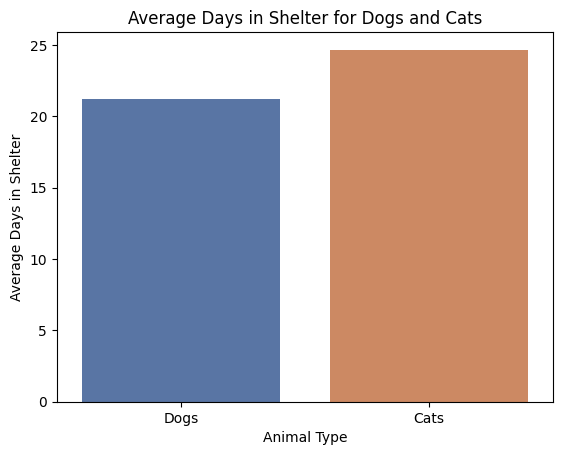

/var/folders/84/gcp9xbms2mj2xtqtdk7w5ckr0000gn/T/ipykernel_76036/4000994171.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Dogs', 'Cats'], y=[avg_age_dogs, avg_age_cats], palette='deep')


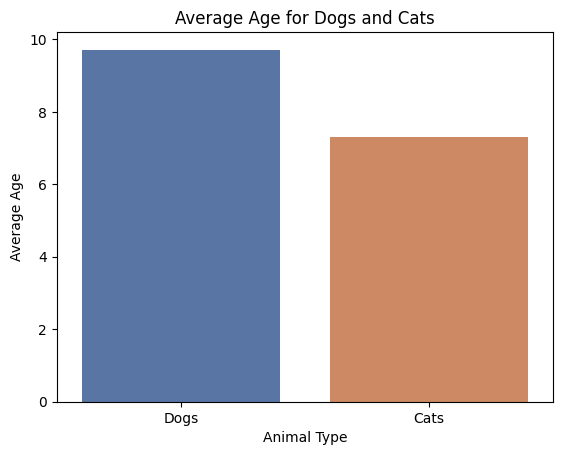

In [225]:
dogs_df = df[df['type'] == 'DOG']
cats_df = df[df['type'] == 'CAT']

# Calculate the average days in the shelter and average age for dogs and cats
avg_days_in_shelter_dogs = dogs_df['days_in_shelter'].mean()
avg_age_dogs = dogs_df['age'].mean()

avg_days_in_shelter_cats = cats_df['days_in_shelter'].mean()
avg_age_cats = cats_df['age'].mean()

# Create bar plots
sns.barplot(x=['Dogs', 'Cats'], y=[avg_days_in_shelter_dogs, avg_days_in_shelter_cats], palette='deep')
plt.xlabel('Animal Type')
plt.ylabel('Average Days in Shelter')
plt.title('Average Days in Shelter for Dogs and Cats')
plt.show()

sns.barplot(x=['Dogs', 'Cats'], y=[avg_age_dogs, avg_age_cats], palette='deep')
plt.xlabel('Animal Type')
plt.ylabel('Average Age')
plt.title('Average Age for Dogs and Cats')
plt.show()

In [21]:
outcome_counts = df_outcome['outcome_type'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
outcome_counts.plot(kind='bar', color='skyblue')
plt.xlabel('')
plt.ylabel('')
plt.title('Count of Values for Each Outcome')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

NameError: name 'df_outcome' is not defined

/var/folders/84/gcp9xbms2mj2xtqtdk7w5ckr0000gn/T/ipykernel_18625/3477527560.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Dogs', 'Cats'], y=[euth_dogs, euth_cats], palette='deep')


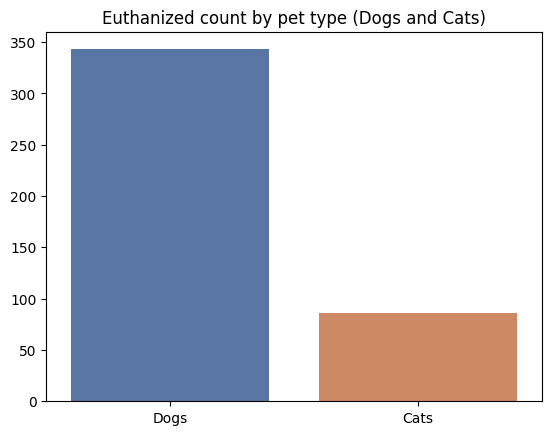

/var/folders/84/gcp9xbms2mj2xtqtdk7w5ckr0000gn/T/ipykernel_18625/3477527560.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Dogs', 'Cats'], y=[adopt_dogs, adopt_cats], palette='deep')


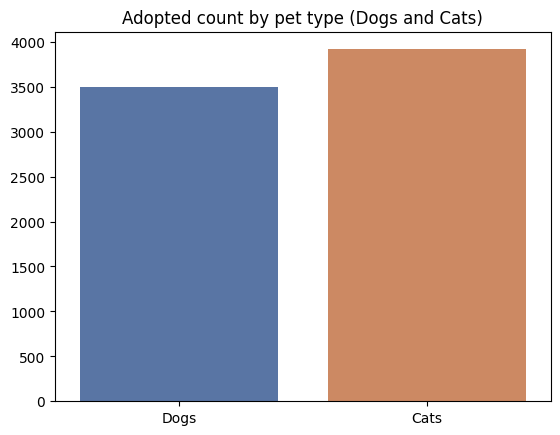

In [22]:
dogs_df = df[df['type'] == 'DOG']
cats_df = df[df['type'] == 'CAT']

# Calculate the average days in the shelter and average age for dogs and cats
euth_dogs = dogs_df[dogs_df['outcome_type'] == 'EUTHANIZE'].shape[0]
euth_cats = cats_df[cats_df['outcome_type'] == 'EUTHANIZE'].shape[0]

# Create bar plots
sns.barplot(x=['Dogs', 'Cats'], y=[euth_dogs, euth_cats], palette='deep')
plt.xlabel('')
plt.ylabel('')
plt.title('Euthanized count by pet type (Dogs and Cats)')
plt.show()

#now for the adopted ones:

dogs_df1 = df[df['type'] == 'DOG']
cats_df1 = df[df['type'] == 'CAT']

# Calculate the average days in the shelter and average age for dogs and cats
adopt_dogs = dogs_df1[dogs_df1['outcome_type'] == 'ADOPTION'].shape[0]
adopt_cats = cats_df1[cats_df1['outcome_type'] == 'ADOPTION'].shape[0]

# Create bar plots
sns.barplot(x=['Dogs', 'Cats'], y=[adopt_dogs, adopt_cats], palette='deep')
plt.xlabel('')
plt.ylabel('')
plt.title('Adopted count by pet type (Dogs and Cats)')
plt.show()


In [228]:
df.outcome_type.value_counts()

outcome_type
ADOPTION           7656
RETURN TO OWNER    6416
TRANSFER           3508
EUTHANIZE           429
RTOS                 38
DISPOSAL             24
DIED                 16
ESCAPED/STOLEN        1
VET                   1
Name: count, dtype: int64

In [229]:
df_adopted = df[df['outcome_type'] == 'ADOPTION']
df_adopted

,type,breed,color,sex,size,animal_id,intake_date,outcome_date,days_in_shelter,intake_type,intake_subtype,outcome_type,outcome_subtype,intake_condition,outcome_condition,intake_jurisdiction,outcome_jurisdiction,outcome_zip_code,location,age
2,DOG,GERM SHEPHERD,BLACK/TAN,Spayed,LARGE,A419963,08/26/2023,03/26/2024,213,STRAY,OVER THE COUNTER,ADOPTION,OTH_MEDIA,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95441.0,"95441(38.70854, -122.90737)",2
4,CAT,DOMESTIC SH,BRN TABBY,Spayed,SMALL,A423448,12/19/2023,01/09/2024,21,STRAY,OVER THE COUNTER,ADOPTION,FINDER,HEALTHY,HEALTHY,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",1
5,DOG,PARSON RUSS TER/CHIHUAHUA SH,CREAM,Spayed,PUPPY,A423033,12/12/2023,01/06/2024,25,OWNER SURRENDER,OVER THE COUNTER,ADOPTION,SCAS WEB,UNKNOWN,HEALTHY,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.4127094, -122.7412153)",1
9,CAT,DOMESTIC SH,BRN TABBY,Neutered,KITTN,A421310,12/30/2023,01/09/2024,10,OWNER SURRENDER,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",1
12,DOG,GERM SHEPHERD/MIX,WHITE/BLACK,Spayed,MED,A422004,11/09/2023,01/09/2024,61,STRAY,FLD_STRAY,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,COUNTY,COUNTY,95472.0,"95472(38.4007555, -122.8277055)",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18498,DOG,GERM SHEPHERD,BLACK/BROWN,Spayed,LARGE,A419896,08/24/2023,11/03/2023,71,STRAY,OVER THE COUNTER,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,COUNTY,SANTA ROSA,95409.0,"95409(38.46382, -122.67058)",2
18499,DOG,PIT BULL,BROWN/WHITE,Neutered,LARGE,A304635,03/26/2014,05/29/2014,64,STRAY,OVER THE COUNTER,ADOPTION,INTERNET,HEALTHY,HEALTHY,SANTA ROSA,OUT OF COUNTY,95422.0,"95422(38.9560273, -122.6373628)",14
18500,CAT,DOMESTIC SH,BRN TABBY/WHITE,Spayed,KITTN,A356601,08/08/2017,09/26/2017,49,STRAY,OVER THE COUNTER,ADOPTION,WALKIN,TREATABLE/REHAB,HEALTHY,SANTA ROSA,*WINDSOR,95492.0,"95492(38.541355, -122.80026)",7
18503,DOG,CHIHUAHUA SH,BROWN,Neutered,TOY,A318075,03/17/2015,04/10/2015,24,STRAY,OVER THE COUNTER,ADOPTION,INTERNET,HEALTHY,HEALTHY,COUNTY,SANTA ROSA,95404.0,"95404(38.44511, -122.708)",12


In [230]:
(df_adopted['size'].value_counts()/len(df_adopted))*100

size
SMALL    34.952978
KITTN    30.694880
MED      12.578370
LARGE     8.751306
PUPPY     7.536573
TOY       5.041797
X-LRG     0.444096
Name: count, dtype: float64

In [231]:
(df_adopted['type'].value_counts()/len(df_adopted))*100

type
CAT      51.162487
DOG      45.715778
OTHER     3.121735
Name: count, dtype: float64

In [232]:
df_disposal = df[df['outcome_type'] == 'DISPOSAL']
df_disposal

,type,breed,color,sex,size,animal_id,intake_date,outcome_date,days_in_shelter,intake_type,intake_subtype,outcome_type,outcome_subtype,intake_condition,outcome_condition,intake_jurisdiction,outcome_jurisdiction,outcome_zip_code,location,age
435,DOG,AUST SHEPHERD,TRICOLOR,Male,SMALL,A424701,02/22/2024,02/28/2024,6,QUARANTINE,FIELD,DISPOSAL,FRA,UNKNOWN,DEAD,*HEALDSBURG,*HEALDSBURG,95448.0,"95448(38.613965, -122.869825)",3
1215,DOG,MALTESE/POODLE TOY,BROWN,Female,TOY,A399804,11/12/2021,11/15/2021,3,STRAY,FIELD,DISPOSAL,DOA,UNKNOWN,DEAD,SANTA ROSA,SANTA ROSA,95401.0,"95401(38.44366, -122.7246163)",5
1552,DOG,GOLDEN RETR,GOLD,Neutered,LARGE,A319664,05/07/2018,09/27/2021,1239,CONFISCATE,FLD_CORONR,DISPOSAL,DOA,UNKNOWN,DEAD,COUNTY,COUNTY,94952.0,"94952(38.237, -122.640695)",10
2501,CAT,DOMESTIC LH,BLACK,Neutered,SMALL,A419883,08/24/2023,08/31/2023,7,QUARANTINE,FIELD,DISPOSAL,FRA,UNKNOWN,DEAD,*PETALUMA,*PETALUMA,94954.0,"94954(38.263265, -122.641035)",5
2630,CAT,DOMESTIC SH,TORTIE,Female,KITTN,A379687,11/13/2018,11/14/2018,1,QUARANTINE,FIELD_OS,DISPOSAL,FRA,UNKNOWN,DEAD,SANTA ROSA,COUNTY,95425.0,"95425(38.79895, -123.01762)",6
2965,DOG,BORDER COLLIE/PIT BULL,BLACK/WHITE,Neutered,LARGE,A380272,04/03/2022,04/30/2022,27,CONFISCATE,FLD_ARREST,DISPOSAL,DOA,UNKNOWN,DEAD,COUNTY,SANTA ROSA,95401.0,"95401(38.44366, -122.7246163)",6
3823,CAT,SIAMESE,TAN/WHITE,Male,SMALL,A384683,03/02/2019,03/03/2019,1,STRAY,FIELD,DISPOSAL,DOA,TREATABLE/REHAB,DEAD,COUNTY,COUNTY,95403.0,"95403(38.4716444, -122.7398255)",5
5435,DOG,ENG SPRNGR SPAN,BROWN/WHITE,Female,MED,A368117,02/14/2018,02/20/2018,6,QUARANTINE,FIELD_OS,DISPOSAL,FRA,UNKNOWN,DEAD,COUNTY,*PETALUMA,94952.0,"94952(38.237, -122.640695)",8
8511,CAT,DOMESTIC SH,ORG TABBY,Neutered,MED,A364338,11/26/2022,12/06/2022,10,QUARANTINE,FIELD,DISPOSAL,FRA,UNKNOWN,DEAD,COUNTY,SANTA ROSA,95401.0,"95401(38.44366, -122.7246163)",15
9443,CAT,DOMESTIC LH,GRAY/WHITE,Spayed,SMALL,A414520,12/23/2022,12/27/2022,4,STRAY,FIELD,DISPOSAL,DOA,UNKNOWN,DEAD,COUNTY,SANTA ROSA,95403.0,"95403(38.4716444, -122.7398255)",13


In [233]:
df_disposal.outcome_condition.value_counts()

outcome_condition
DEAD    24
Name: count, dtype: int64

In [234]:
(df.intake_type.value_counts()/len(df['intake_type']))*100

intake_type
STRAY              71.540715
OWNER SURRENDER    14.600033
CONFISCATE          7.645530
ADOPTION RETURN     2.338438
QUARANTINE          1.868539
TRANSFER            1.824313
BORN HERE           0.182431
Name: count, dtype: float64

In [235]:
df_int_type_return=df[df['intake_type'] == 'ADOPTION RETURN']
(df_int_type_return.outcome_type.value_counts()/len(df_int_type_return))*100

outcome_type
ADOPTION           82.505910
TRANSFER           15.366430
RETURN TO OWNER     1.182033
EUTHANIZE           0.945626
Name: count, dtype: float64

In [236]:
df.nunique()

type                        3
breed                     906
color                     280
sex                         5
size                        7
animal_id               15866
intake_date              3358
outcome_date             2847
days_in_shelter           287
intake_type                 7
intake_subtype             33
outcome_type                9
outcome_subtype           195
intake_condition            5
outcome_condition           6
intake_jurisdiction        13
outcome_jurisdiction       12
outcome_zip_code          605
location                  612
age                        21
dtype: int64

Dataframe to indentify and analyze those animals that were more than once at the Shelter:

In [237]:
df_repeated_id=df.groupby('animal_id').filter(lambda x: len(x) > 1)
df_repeated_id.shape

(3815, 20)

In [238]:
df_repeated_id.outcome_type.value_counts()

outcome_type
RETURN TO OWNER    2230
ADOPTION           1200
TRANSFER            259
EUTHANIZE            89
RTOS                 29
DISPOSAL              5
DIED                  3
Name: count, dtype: int64

In [239]:
df_repeated_id.isna().sum()

type                    0
breed                   0
color                   0
sex                     0
size                    0
animal_id               0
intake_date             0
outcome_date            0
days_in_shelter         0
intake_type             0
intake_subtype          0
outcome_type            0
outcome_subtype         0
intake_condition        0
outcome_condition       0
intake_jurisdiction     0
outcome_jurisdiction    0
outcome_zip_code        0
location                0
age                     0
dtype: int64

In [240]:
df_euth = df[df['outcome_type']=='EUTHANIZE']
df_euth.outcome_subtype.value_counts()

outcome_subtype
AGGRESSIVE    255
ILL SEVERE     91
BEH SEVERE     44
CON SEVERE     21
INJ SEVERE     15
FERAL           1
ILL MINOR       1
FELV/FIV        1
Name: count, dtype: int64

In [241]:
df_euth.breed.value_counts().head()

breed
PIT BULL          100
DOMESTIC SH        46
GERM SHEPHERD      30
PIT BULL/MIX       27
SIBERIAN HUSKY     19
Name: count, dtype: int64

In [242]:
df_euth.describe()

,days_in_shelter,outcome_zip_code,age
count,429.000000,429.000000,429.000000
mean,29.214452,94748.552448,11.296037
std,43.973927,5545.795635,4.112155
min,0.000000,28730.000000,2.000000
25%,11.000000,95401.000000,9.000000
50%,19.000000,95405.000000,11.000000
75%,30.000000,95409.000000,14.000000
max,360.000000,95825.000000,20.000000


In [243]:
df_shelter = pd.read_csv('df_shelter.csv')
df_shelter

,type,breed,color,sex,size,animal_id,intake_date,outcome_date,days_in_shelter,intake_type,intake_subtype,outcome_type,outcome_subtype,intake_condition,outcome_condition,intake_jurisdiction,outcome_jurisdiction,outcome_zip_code,location,age
0,DOG,PIT BULL,BR BRINDLE/WHITE,Neutered,LARGE,A389457,07/16/2019,08/30/2019,45,STRAY,FIELD,TRANSFER,HSSC,HEALTHY,HEALTHY,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",8
1,DOG,PIT BULL,BR BRINDLE/WHITE,Neutered,LARGE,A389457,03/24/2024,03/26/2024,2,STRAY,FLD_STRAY,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",8
2,DOG,GERM SHEPHERD,BLACK/TAN,Spayed,LARGE,A419963,08/26/2023,03/26/2024,213,STRAY,OVER THE COUNTER,ADOPTION,OTH_MEDIA,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95441.0,"95441(38.70854, -122.90737)",2
3,DOG,SHIH TZU,TAN,Female,TOY,A425507,03/26/2024,03/26/2024,0,STRAY,OVER THE COUNTER,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,COUNTY,*SEBASTOPOL,95472.0,"95472(38.4007555, -122.8277055)",10
4,CAT,DOMESTIC SH,BRN TABBY,Spayed,SMALL,A423448,12/19/2023,01/09/2024,21,STRAY,OVER THE COUNTER,ADOPTION,FINDER,HEALTHY,HEALTHY,COUNTY,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18084,DOG,CHIHUAHUA SH,BR BRINDLE,Neutered,TOY,A311089,09/03/2014,09/12/2014,9,STRAY,FIELD,ADOPTION,WALKIN,HEALTHY,HEALTHY,COUNTY,OUT OF COUNTY,94591.0,"94591(38.10605, -122.22251)",11
18085,DOG,LABRADOR RETR/MIX,SILVER,Spayed,MED,A393222,03/03/2016,03/04/2016,1,STRAY,FIELD,RETURN TO OWNER,OVER THE COUNTER_WEB,HEALTHY,HEALTHY,*WINDSOR,*WINDSOR,95492.0,"95492(38.541355, -122.80026)",14
18086,DOG,CHIHUAHUA SH/MIX,TAN,Spayed,SMALL,A352712,06/20/2017,06/21/2017,1,STRAY,OVER THE COUNTER,RETURN TO OWNER,OVER THE COUNTER_MCHIP,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95462.0,"95462(38.46819, -123.01142)",8
18087,CAT,DOMESTIC SH,BLACK/WHITE,Neutered,SMALL,A405315,06/15/2021,07/08/2021,23,OWNER SURRENDER,OVER THE COUNTER,TRANSFER,HSSC,UNKNOWN,TREATABLE/REHAB,SANTA ROSA,COUNTY,95407.0,"95407(38.4127094, -122.7412153)",6


In [244]:
df_shelter.dtypes

type                     object
breed                    object
color                    object
sex                      object
size                     object
animal_id                object
intake_date              object
outcome_date             object
days_in_shelter           int64
intake_type              object
intake_subtype           object
outcome_type             object
outcome_subtype          object
intake_condition         object
outcome_condition        object
intake_jurisdiction      object
outcome_jurisdiction     object
outcome_zip_code        float64
location                 object
age                       int64
dtype: object

#### 2nd CSV for EDA:

In [245]:
df_shelter_national_stats = pd.read_csv('shelters_3y_stats.csv', sep=';')

In [246]:
df_shelter_national_stats

,State,Year,Organizations,Intake - Relinquished By Owner Total-Feline,Intake - Stray At Large Total-Feline,Intake - Transferred In Total-Feline,Intake - Owner Intended Euthanasia Total-Feline,Intakes - Other Intakes Total-Feline,Live Outcome - Adoption Total-Feline,Live Outcome - Returned To Owner Total-Feline,Live Outcome - Returned To Field Total-Feline,Live Outcome - Transferred Out Total-Feline,Live outcome - Other Live Outcome Total-Feline,Other Outcome - Died In Care Total-Feline,Other Outcome - Lost In Care Total-Feline,Other Outcome - Owner Intended Euthanasia Total-Feline,Other Outcome - Shelter Euthanasia Total-Feline,Intake - Relinquished By Owner Total-Canine,Intake - Stray At Large Total-Canine,Intake - Transferred In Total-Canine,Intake - Owner Intended Euthanasia Total-Canine,Intakes - Other Intakes Total-Canine,Live Outcome - Adoption Total-Canine,Live Outcome - Returned To Owner Total-Canine,Live Outcome - Returned To Field Total-Canine,Live Outcome - Transferred Out Total-Canine,Live outcome - Other Live Outcome Total-Canine,Other Outcome - Died In Care Total-Canine,Other Outcome - Lost In Care Total-Canine,Other Outcome - Owner Intended Euthanasia Total-Canine,Other Outcome - Shelter Euthanasia Total-Canine
0,AK,2021,5,886,1620,85,37,133,2217,365,1,70,10,100,0,38,79,565,1130,0,75,144,763,948,0,3,6,7,0,80,82
1,AK,2022,5,1128,1878,51,42,146,2158,310,0,81,42,51,0,49,490,808,1325,7,109,189,1106,1006,0,1,3,4,1,112,216
2,AK,2023,5,911,1814,45,42,122,2148,223,0,36,8,57,1,45,345,672,1276,3,117,210,993,880,0,8,4,12,1,149,257
3,AL,2021,17,1548,3414,707,0,644,3816,78,218,655,90,221,7,6,1664,3566,8323,1435,27,1953,6577,2101,1,3592,90,180,7,7,2994
4,AL,2022,17,1419,3400,816,3,503,4307,65,92,479,30,164,13,0,1421,3289,9517,872,4,2277,6681,2012,0,3190,808,193,14,0,3262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,WV,2022,14,1062,4318,206,0,318,2882,91,56,1976,89,223,2,1,515,1298,2987,309,0,534,1787,826,0,2312,1,67,9,0,147
149,WV,2023,14,1253,3823,148,0,503,2955,33,23,2136,20,217,3,0,288,1396,2665,239,7,613,2097,644,0,1946,176,56,2,1,150
150,WY,2021,9,975,1647,379,19,819,2456,271,15,205,645,39,4,19,311,796,1832,675,58,656,1894,1684,0,240,441,12,2,59,117
151,WY,2022,9,1135,1985,395,15,343,2673,269,54,167,135,77,3,19,355,1037,1737,638,18,474,2083,1645,2,291,5,11,0,32,93


In [247]:
df_shelter_national_stats.columns = df_shelter_national_stats.columns.str.lower().str.strip().str.replace(" - "," ").str.replace(" ","_").str.replace("-","_")

In [248]:
# We now aggregate the necessary columns from the main csv

# Sum of all intake columns for feline:
intake_agg_feline_df= df_shelter_national_stats[['intake_relinquished_by_owner_total_feline',
 'intake_stray_at_large_total_feline',
 'intake_transferred_in_total_feline',
 'intake_owner_intended_euthanasia_total_feline',
 'intakes_other_intakes_total_feline']]
# Sum of all outcome columns for feline:
outcome_agg_feline_df= df_shelter_national_stats[['live_outcome_adoption_total_feline',
 'live_outcome_returned_to_owner_total_feline',
 'live_outcome_returned_to_field_total_feline',
 'live_outcome_transferred_out_total_feline',
 'live_outcome_other_live_outcome_total_feline',
 'other_outcome_died_in_care_total_feline',
 'other_outcome_lost_in_care_total_feline',
 'other_outcome_owner_intended_euthanasia_total_feline',
 'other_outcome_shelter_euthanasia_total_feline']]
# Sum of all intake columns for canine:
intake_agg_canine_df = df_shelter_national_stats[['intake_relinquished_by_owner_total_canine',
 'intake_stray_at_large_total_canine',
 'intake_transferred_in_total_canine',
 'intake_owner_intended_euthanasia_total_canine',
 'intakes_other_intakes_total_canine']]
# Sum of all outcome columns for canine:
outcome_agg_canine_df = df_shelter_national_stats[['live_outcome_adoption_total_canine',
 'live_outcome_returned_to_owner_total_canine',
 'live_outcome_returned_to_field_total_canine',
 'live_outcome_transferred_out_total_canine',
 'live_outcome_other_live_outcome_total_canine',
 'other_outcome_died_in_care_total_canine',
 'other_outcome_lost_in_care_total_canine',
 'other_outcome_owner_intended_euthanasia_total_canine',
 'other_outcome_shelter_euthanasia_total_canine']]
# Grand total intakes: 
intake_agg_total_df = df_shelter_national_stats[['intake_relinquished_by_owner_total_feline',
 'intake_stray_at_large_total_feline',
 'intake_transferred_in_total_feline',
 'intake_owner_intended_euthanasia_total_feline',
 'intakes_other_intakes_total_feline','intake_relinquished_by_owner_total_canine',
 'intake_stray_at_large_total_canine',
 'intake_transferred_in_total_canine',
 'intake_owner_intended_euthanasia_total_canine',
 'intakes_other_intakes_total_canine']]
# Grand total outcomes: 
outcome_agg_total_df =df_shelter_national_stats[['live_outcome_adoption_total_feline',
 'live_outcome_returned_to_owner_total_feline',
 'live_outcome_returned_to_field_total_feline',
 'live_outcome_transferred_out_total_feline',
 'live_outcome_other_live_outcome_total_feline',
 'other_outcome_died_in_care_total_feline',
 'other_outcome_lost_in_care_total_feline',
 'other_outcome_owner_intended_euthanasia_total_feline',
 'other_outcome_shelter_euthanasia_total_feline','live_outcome_adoption_total_canine',
 'live_outcome_returned_to_owner_total_canine',
 'live_outcome_returned_to_field_total_canine',
 'live_outcome_transferred_out_total_canine',
 'live_outcome_other_live_outcome_total_canine',
 'other_outcome_died_in_care_total_canine',
 'other_outcome_lost_in_care_total_canine',
 'other_outcome_owner_intended_euthanasia_total_canine',
 'other_outcome_shelter_euthanasia_total_canine']]

In [249]:
# I now create the summary DataFrame that will store the aggregated columns
df_summary_table = pd.DataFrame()

In [250]:
# And now I populate the summary DataFrame:
df_summary_table['state']=df_shelter_national_stats['state']
df_summary_table['year']=df_shelter_national_stats['year']
df_summary_table['intake_agg_feline'] = intake_agg_feline_df.sum(numeric_only=True,axis=1)
df_summary_table['outcome_agg_feline'] = outcome_agg_feline_df.sum(numeric_only=True,axis=1)
df_summary_table['intake_agg_canine'] = intake_agg_canine_df.sum(numeric_only=True,axis=1)
df_summary_table['outcome_agg_canine'] = outcome_agg_canine_df.sum(numeric_only=True,axis=1)
df_summary_table['intake_agg_total'] = intake_agg_total_df.sum(numeric_only=True,axis=1)
df_summary_table['outcome_agg_total'] = outcome_agg_total_df.sum(numeric_only=True,axis=1)
df_summary_table


,state,year,intake_agg_feline,outcome_agg_feline,intake_agg_canine,outcome_agg_canine,intake_agg_total,outcome_agg_total
0,AK,2021,2761,2880,1914,1889,4675,4769
1,AK,2022,3245,3181,2438,2449,5683,5630
2,AK,2023,2934,2863,2278,2304,5212,5167
3,AL,2021,6313,6755,15304,15549,21617,22304
4,AL,2022,6141,6571,15959,16160,22100,22731
...,...,...,...,...,...,...,...,...
148,WV,2022,5904,5835,5128,5149,11032,10984
149,WV,2023,5727,5675,4920,5072,10647,10747
150,WY,2021,3839,3965,4017,4449,7856,8414
151,WY,2022,3873,3752,3904,4162,7777,7914


In [251]:
# df_summary_table.to_csv('summary_shelter_3y.csv', index=False)

In [252]:
df_intake_outcome_3y = df_summary_table.groupby(['year'])[['intake_agg_total','outcome_agg_total']].sum()
df_intake_outcome_3y = df_intake_outcome_3y.reset_index()

In [253]:
# df_intake_outcome_3y.to_csv('intake_outcome_3y.csv', index=False)

In [254]:
plt.plot(t, list(zip(a,b,c)), label=['sin','cos','sin+cos']) 
plt.legend()
plt.show()

NameError: name 't' is not defined

In [ ]:
list(df_shelter_national_stats.columns)

['state',
 'year',
 'organizations',
 'intake_relinquished_by_owner_total_feline',
 'intake_stray_at_large_total_feline',
 'intake_transferred_in_total_feline',
 'intake_owner_intended_euthanasia_total_feline',
 'intakes_other_intakes_total_feline',
 'live_outcome_adoption_total_feline',
 'live_outcome_returned_to_owner_total_feline',
 'live_outcome_returned_to_field_total_feline',
 'live_outcome_transferred_out_total_feline',
 'live_outcome_other_live_outcome_total_feline',
 'other_outcome_died_in_care_total_feline',
 'other_outcome_lost_in_care_total_feline',
 'other_outcome_owner_intended_euthanasia_total_feline',
 'other_outcome_shelter_euthanasia_total_feline',
 'intake_relinquished_by_owner_total_canine',
 'intake_stray_at_large_total_canine',
 'intake_transferred_in_total_canine',
 'intake_owner_intended_euthanasia_total_canine',
 'intakes_other_intakes_total_canine',
 'live_outcome_adoption_total_canine',
 'live_outcome_returned_to_owner_total_canine',
 'live_outcome_returned_t

In [ ]:
df_shelter_national_stats['total_live_outcome_feline'] = df_test.sum(numeric_only=True,axis=1)

In [ ]:
df_shelter_national_stats

,state,year,organizations,intake_relinquished_by_owner_total_feline,intake_stray_at_large_total_feline,intake_transferred_in_total_feline,intake_owner_intended_euthanasia_total_feline,intakes_other_intakes_total_feline,live_outcome_adoption_total_feline,live_outcome_returned_to_owner_total_feline,...,live_outcome_returned_to_owner_total_canine,live_outcome_returned_to_field_total_canine,live_outcome_transferred_out_total_canine,live_outcome_other_live_outcome_total_canine,other_outcome_died_in_care_total_canine,other_outcome_lost_in_care_total_canine,other_outcome_owner_intended_euthanasia_total_canine,other_outcome_shelter_euthanasia_total_canine,total,total_live_outcome_feline
0,AK,2021,5,886,1620,85,37,133,2217,365,...,948,0,3,6,7,0,80,82,22940,2663
1,AK,2022,5,1128,1878,51,42,146,2158,310,...,1006,0,1,3,4,1,112,216,26680,2591
2,AK,2023,5,911,1814,45,42,122,2148,223,...,880,0,8,4,12,1,149,257,24814,2415
3,AL,2021,17,1548,3414,707,0,644,3816,78,...,2101,1,3592,90,180,7,7,2994,91918,4857
4,AL,2022,17,1419,3400,816,3,503,4307,65,...,2012,0,3190,808,193,14,0,3262,93740,4973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,WV,2022,14,1062,4318,206,0,318,2882,91,...,826,0,2312,1,67,9,0,147,48104,5094
149,WV,2023,14,1253,3823,148,0,503,2955,33,...,644,0,1946,176,56,2,1,150,46862,5167
150,WY,2021,9,975,1647,379,19,819,2456,271,...,1684,0,240,441,12,2,59,117,36600,3592
151,WY,2022,9,1135,1985,395,15,343,2673,269,...,1645,2,291,5,11,0,32,93,35444,3298


In [ ]:
columns_test = ['live_outcome_adoption_total_feline',
       'live_outcome_returned_to_owner_total_feline',
       'live_outcome_returned_to_field_total_feline',
       'live_outcome_transferred_out_total_feline',
       'live_outcome_other_live_outcome_total_feline']

In [ ]:
df3 = df_shelter_national_stats[columns_test].agg("sum", axis=1)
print(df3)

0      2663
1      2591
2      2415
3      4857
4      4973
       ... 
148    5094
149    5167
150    3592
151    3298
152    4075
Length: 153, dtype: int64


In [ ]:
# # List of columns to aggregate
columns_to_aggregate1 = [
    'live_outcome_adoption_total_feline',
       'live_outcome_returned_to_owner_total_feline',
       'live_outcome_returned_to_field_total_feline',
       'live_outcome_transferred_out_total_feline',
       'live_outcome_other_live_outcome_total_feline'
]

# # Sum the columns specified in columns_to_aggregate
df_shelter_national_stats['live_outcome_feline'] = df_shelter_national_stats[columns_to_aggregate1].sum()

# # Concatenate the sums to the DataFrame horizontally
# df_concatenated = pd.concat([df, df[columns_to_aggregate].sum(axis=0).rename('Total')], axis=1)

# print(df_concatenated)

# df_shelter_national_stats

df_shelter_national_stats

KeyError: "None of [Index(['live_outcome_adoption_total_feline',\n       'live_outcome_returned_to_owner_total_feline',\n       'live_outcome_returned_to_field_total_feline',\n       'live_outcome_transferred_out_total_feline',\n       'live_outcome_other_live_outcome_total_feline'],\n      dtype='object')] are in the [columns]"

In [ ]:
# # List of columns to aggregate
columns_to_aggregate1 = [
    'live_outcome_adoption_total_feline',
    'live_outcome_returned_to_owner_total_feline',
    'live_outcome_returned_to_field_total_feline',
    'live_outcome_transferred_out_total_feline',
    'live_outcome_other_live_outcome_total_feline'
]

# # Sum the columns specified in columns_to_aggregate
df_shelter_national_stats['live_outcome_feline'] = df_shelter_national_stats[columns_to_aggregate1].sum(axis=1)

df_shelter_national_stats

KeyError: "None of [Index(['live_outcome_adoption_total_feline',\n       'live_outcome_returned_to_owner_total_feline',\n       'live_outcome_returned_to_field_total_feline',\n       'live_outcome_transferred_out_total_feline',\n       'live_outcome_other_live_outcome_total_feline'],\n      dtype='object')] are in the [columns]"

In [ ]:
# Example aggregation based on State, Year, and Type of Animal (Feline or Canine)
aggregated_data = df_shelter_national_stats.groupby(['State', 'Year']).sum()

# If you want to aggregate based on additional factors like Type of Intake or Outcome, you can include them in the groupby function as well
# For example, to aggregate based on State, Year, and Type of Intake
aggregated_data = df.groupby(['State', 'Year', 'Intake Type']).sum()

# You can also aggregate separately for Feline and Canine data
feline_data = df[df['Type'] == 'Feline'].groupby(['State', 'Year']).sum()
canine_data = df[df['Type'] == 'Canine'].groupby(['State', 'Year']).sum()
